# Drzewo decyzyjne – Social_Network_Ads

W tym przykładzie wykorzystujemy klasyfikator drzewa decyzyjnego (DecisionTreeClassifier) do przewidywania, czy użytkownik zakupi produkt na podstawie kilku cech:

- **Gender** (zakodowany jako 0/1) – płeć
- **Age** – wiek
- **EstimatedSalary** – szacowana roczna pensja

Zbudujemy drzewo, ocenimy jego skuteczność, wypiszemy warunki (reguły) utworzone przez model oraz zwizualizujemy całe drzewo. 

In [41]:
# Import bibliotek
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [42]:
# Ustawienie hiperparametrów drzewa decyzyjnego
max_depth = 2          # maksymalna głębokość drzewa; None = brak limitu
criterion = 'gini'     # funkcja podziału: 'gini' lub 'entropy'
random_state = 0       # ziarno losowości dla powtarzalności wyników


In [43]:
# Wczytanie danych
file_path = 'Social_Network_Ads.csv'  # plik z danymi (w tym samym folderze)

df = pd.read_csv(file_path)

# Usuwamy kolumnę 'User ID' – jest technicznym identyfikatorem
if 'User ID' in df.columns:
    df = df.drop('User ID', axis=1)

# Kodowanie kolumny 'Gender' (string -> liczbowe wartości 0/1)
le = LabelEncoder()
if df['Gender'].dtype == 'object':
    df['Gender'] = le.fit_transform(df['Gender'])

# Definicja cech (X) i etykiety (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

print('Pierwsze 5 wierszy po przygotowaniu danych:')
print(df.head())


Pierwsze 5 wierszy po przygotowaniu danych:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0


In [44]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
print(f'Rozmiar zbioru treningowego: {X_train.shape}, zbioru testowego: {X_test.shape}')


Rozmiar zbioru treningowego: (300, 3), zbioru testowego: (100, 3)


In [45]:
# Trenowanie drzewa decyzyjnego z ustawionymi hiperparametrami

clf = DecisionTreeClassifier(
    max_depth=max_depth,
    criterion=criterion,
    random_state=random_state
)

clf.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = clf.predict(X_test)

# Wyświetlenie wyników
print('Macierz pomyłek (confusion matrix):')
print(confusion_matrix(y_test, y_pred))

print('Raport klasyfikacji:')
print(classification_report(y_test, y_pred))


Macierz pomyłek (confusion matrix):
[[64  4]
 [ 2 30]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [46]:
# Wypisanie warunków (reguł) utworzonych przez drzewo decyzyjne

feature_names = X.columns.tolist()
rules_text = export_text(clf, feature_names=feature_names)
print('Reguły drzewa decyzyjnego:')
print(rules_text)


Reguły drzewa decyzyjnego:
|--- Age <= 44.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- class: 0
|   |--- EstimatedSalary >  90500.00
|   |   |--- class: 1
|--- Age >  44.50
|   |--- Age <= 46.50
|   |   |--- class: 1
|   |--- Age >  46.50
|   |   |--- class: 1



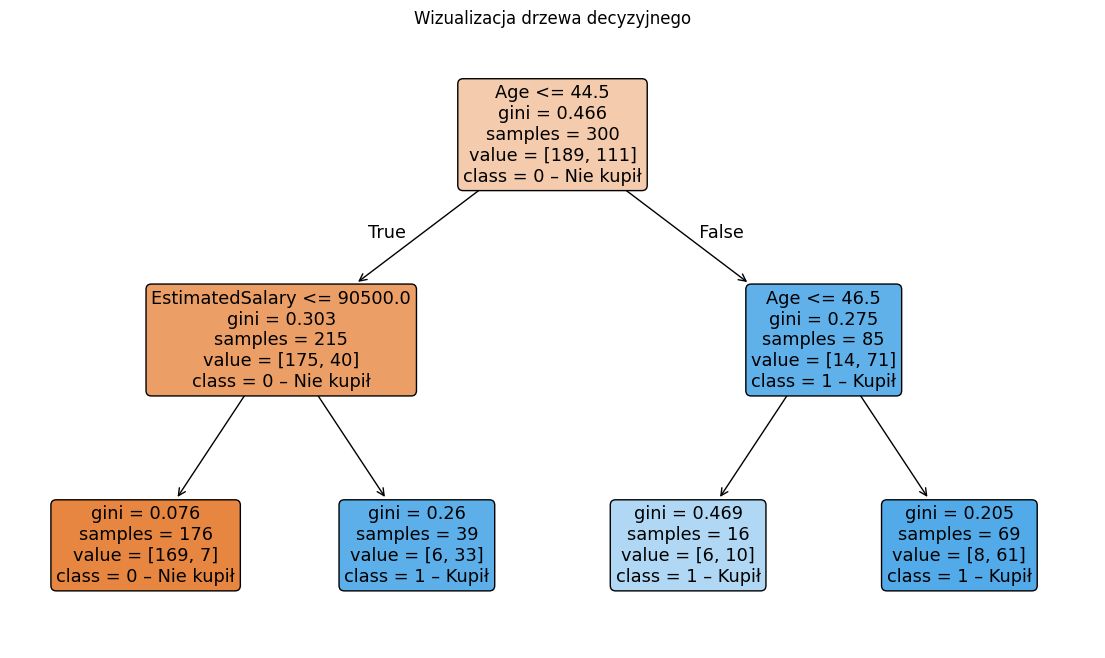

In [47]:
# Wizualizacja drzewa decyzyjnego

plt.figure(figsize=(14, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['0 – Nie kupił', '1 – Kupił'],
    filled=True,
    rounded=True
)
plt.title('Wizualizacja drzewa decyzyjnego')
plt.show()


In [48]:
# Przykładowe predykcje dla dwóch ręcznie wpisanych osób

# Dwa przykładowe rekordy: [Gender, Age, EstimatedSalary]
# 0 – kobieta, 1 – mężczyzna
test_samples = pd.DataFrame([
    [0, 30, 50000],  # przykład 1: kobieta, 30 lat, 50 000
    [1, 40, 80000]   # przykład 2: mężczyzna, 40 lat, 80 000
], columns=['Gender', 'Age', 'EstimatedSalary'])

# Predykcje modelu
predictions = clf.predict(test_samples)

print('Predykcje dla dwóch przykładowych osób:')
for i, sample in test_samples.iterrows():
    label = 'Kupił' if predictions[i] == 1 else 'Nie kupił'
    print(f'Osoba {i+1}: {list(sample)} -> {label} (klasa: {predictions[i]})')


Predykcje dla dwóch przykładowych osób:
Osoba 1: [0, 30, 50000] -> Nie kupił (klasa: 0)
Osoba 2: [1, 40, 80000] -> Nie kupił (klasa: 0)
